# Summary

This notebook introduces the basic concepts in statistical genetics, including:

- kinship, GRM

# Intuition

Here we will put a cartoon

# Notations

## Genomic Relationship Matrix 

The **Genomic Relationship Matrix (GRM)** is a standardized version of the kinship matrix that accounts for allele frequencies. One common formulation is:

$$
\mathbf{G} = \frac{ \mathbf{X} \mathbf{X}^T}{M}
$$

Where:
- $\mathbf{X}$ is the scaled genotype matrix of $N$ individuals and $M$ genetic variants.
- $ \mathbf{G} $ is an $ N \times N $ matrix capturing the pairwise genetic relationships.

Note that because $\mathbf{X}$ is scaled so that the variance of each SNP is 1, instead of across individuals, so the diagonal elements of $\mathbf{G}$ is generally not 1.

## Kinship

> The kinship coefficient is a simple measure of relatedness, defined as the probability that a pair of randomly sampled homologous alleles are identical by descent (IBD). More simply, it is the probability that an allele selected randomly from an individual, $i$, and an allele selected at the same autosomal locus from another individual, $j$, are identical and from the same ancestor. [(ref: wiki)](https://en.wikipedia.org/wiki/Coefficient_of_relationship#Kinship_coefficient) 
>
> **The coefficient of relatedness is equal to twice the kinship coefficient.**
>
>| Relationship                                      | Kinship Coefficient |
|--------------------------------------------------|---------------------|
| Self                                            | 1/2                 |
| Mother / Father / Daughter / Son                | 1/4                 |
| Sister / Brother                                | 1/4                 |
| Grandmother / Grandfather / Granddaughter / Grandson | 1/8             |
| Aunt / Uncle / Niece / Nephew                   | 1/8                 |
| First Cousin                                    | 1/16                |
| Half-Sister / Half-Brother                      | 1/8                 |
| Half-First Cousin                               | 1/32                |
| Double-First Cousin                             | 1/8                 |
>
> The kinship coefficient between two individuals, $i$ and $j$, is represented as $\Phi_{ij}$. 
>
> - The kinship coefficient between a non-inbred individual and itself, $\Phi_{ii}$, is equal to 1/2. This is due to the fact that humans are diploid, meaning the only way for the randomly chosen alleles to be identical by descent is if the same allele is chosen twice (probability $\frac{1}{2}$). 
>
> - Similarly, the relationship between a parent and a child is found by the chance that the randomly picked allele in the child is from the parent (probability $\frac{1}{2}$) and the probability of the allele that is picked from the parent being the same one passed to the child (probability $\frac{1}{2}$). Since these two events are independent of each other, they are multiplied $\Phi_{ij} = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$

# Example

In this example we generate 100 variants for 1000 individuals (instead of 3 variants for 5 individuals) to avoid sampling noise. 

In [38]:
rm(list=ls())
set.seed(123)  # For reproducibility
library(ggplot2)
library(reshape2)
library(gridExtra)

# Define sample size and number of variants
N <- 1000
M <- 100

# Generate a random genotype matrix (values 0, 1, 2)
X_raw <- matrix(sample(0:2, N * M, replace = TRUE), nrow = N, ncol = M)

# Standardize the genotype matrix
X <- scale(X_raw, scale = TRUE)


## Calculate GRM

            [,1]       [,2]        [,3]        [,4]        [,5]
[1,]  1.01450995 0.01580668 -0.07039107  0.10717332 -0.04400968
[2,]  0.01580668 0.90376931  0.02681972  0.18377189  0.04978174
[3,] -0.07039107 0.02681972  0.99466625  0.03036103 -0.04661844
[4,]  0.10717332 0.18377189  0.03036103  0.95069770 -0.12636758
[5,] -0.04400968 0.04978174 -0.04661844 -0.12636758  0.95060759


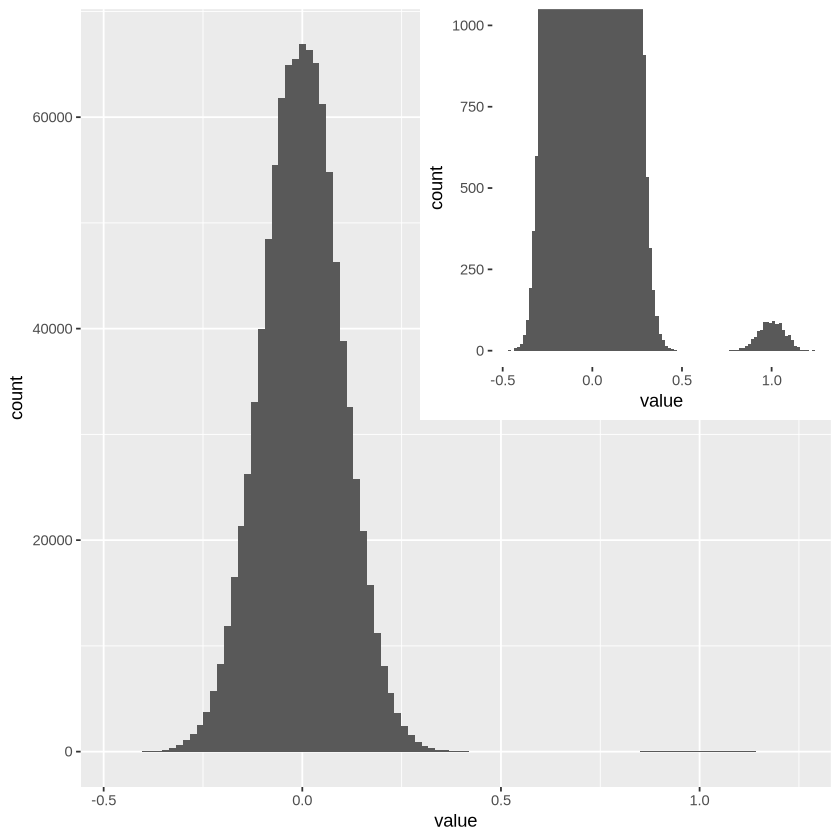

In [41]:
# Compute the GRM
GRM <- (X %*% t(X)) / M

# Print the first few rows and columns
print(GRM[1:5, 1:5])  # Show a small subset of GRM
p1 = ggplot(melt(GRM), aes(value)) + geom_histogram(bins=100) 
p2 = ggplot(melt(GRM), aes(value)) + geom_histogram(bins=100) +
  coord_cartesian(ylim=c(0,N)) + theme(panel.background=element_blank())
grid.arrange(p1, p2, layout_matrix=matrix(c(1,1,2,1), 2))

Offdiagonal elements represent the relatedness between two individuals (in histogram the large peak centered at 0). Diagonal elements represent the relatedness of an individual with itself, which is the average homozygosity or the level of inbreeding (in histogram the small peak centered at 1). 

- While the LD of a SNP with itself is 1 by definition, the genetic relatedness of an individual with itself can vary around one, because **the genotype scaling is performed per SNP**, not per individual.  

## Calculate kinship

In [42]:
# Compute Kinship Matrix
Kinship <- 0.5 * GRM  # Kinship is half of GRM

print("Kinship Matrix:")
print(Kinship[1:5,1:5])

[1] "Kinship Matrix:"
             [,1]        [,2]        [,3]        [,4]        [,5]
[1,]  0.507254977 0.007903342 -0.03519554  0.05358666 -0.02200484
[2,]  0.007903342 0.451884656  0.01340986  0.09188595  0.02489087
[3,] -0.035195537 0.013409860  0.49733313  0.01518052 -0.02330922
[4,]  0.053586661 0.091885947  0.01518052  0.47534885 -0.06318379
[5,] -0.022004840 0.024890868 -0.02330922 -0.06318379  0.47530380


# Supplementary

- [ ] double check details of formulas and wikipedia to see if this is correct

## Kinship Matrix

The **kinship matrix** estimates the genetic similarity between individuals. Given a genotype matrix $\mathbf{X}$ of size **$ N \times M $** (where **$ N $** is the number of individuals and **$ M $** is the number of variants), it is computed as:

$$
\mathbf{K} = \frac{1}{J} \mathbf{X} \mathbf{X}^T
$$

Where:
- $ \mathbf{X} $ is the centered genotype matrix (mean genotype for each variant is subtracted).
- $ M $ is the number of variants.
- $ \mathbf{K} $ is an $ N \times N $ symmetric matrix, where each entry $ K_{ij} $ represents the genetic relatedness between individual $ i $ and individual $ j $.

> slide 54 from GW




## Key Differences
- **Kinship Matrix ($ \mathbf{K} $)**: Measures relatedness but may not account for allele frequencies.
- **GRM ($ \mathbf{G} $)**: Incorporates allele frequency scaling, making it widely used in GWAS and mixed models.

These matrices are crucial for capturing genetic structure and controlling for population stratification in association studies.

